In [1]:
import numpy as np
from fusiondls import LfuncN, LRBv21, file_read
from fusiondls.Analytic_DLS import CfInt

# Here are some useful labels to use for plotting throughout notebook
store_labels = dict()
store_labels["cvar"] = {"density" : "$n_{u}\ (m^{-3})$",
                        "power" : "$q_{\parallel}\ (Wm^{-2})$",
                        "impurity_frac" : "$f_{z}$"}
store_labels["crel"] = {"density" : "$n_{u}\ /\ n_{u0}$ $\ (m^{-3})$",
                        "power" : "$q_{\parallel}\ /\ q_{\parallel0} (Wm^{-2})$",
                        "impurity_frac" : "$f_{z}\ /\ f_{z0}$"}

store_names =         {"density" : "$n_{u}\ /\ n_{u0}$",
                        "power" : "$q_{\parallel0}\ /\ q_{\parallel}$",
                        "impurity_frac" : "$f_{z}\ /\ f_{z0}$"}

store_cnames =         {"density" : "$[n_{u}\ /\ n_{u0}]^{1}$",
                        "power" : "$[q_{\parallel0}\ /\ q_{\parallel}]^{5/7}$",
                        "impurity_frac" : "$[f_{z}\ /\ f_{z0}]^{0.5}$"}

# Overview
This notebook is a test to ensure the results from the numerical DLS model converge to the analytical results.

In [2]:
eqb = file_read("eqb_store_lores.pkl")
data = eqb["V10"] 

In [3]:
# results = dict()

#set switches
radios_default = {
    "ionisation": False,  # WIP - do not use. in development
    "upstreamGrid": True, # SET TRUE if including domain above xpoint. if true, source of divertor heat flux comes from radial transport upstream, and Tu is at the midplane. If false, heat flux simply enters at the x point as qi, and Tu is located at the x point. 
    "fluxlim": False,  # WIP - do not use. if true, turns on a flux limiter with coefficient alpha
}

#set general run parameters
constants_default = {
    "gamma_sheath": 7, #sheath transmittion coefficient for virtual target. Choice does not matter if Tt is low
    "Tt": 1, # requested virtual target temp for calculating heat flux at detachment front. Aim for low (sub 1eV) Tt
    "qpllu0": 5e9, # heat flux density at the x point
    "nu" : 1e20, # Upstream density (if constant)
    "nu0" : 1e20, # Upstream density (if constant)
    "cz0" : 0.02, # Impurity fraction (if constant)
    
    "Lfunc": LfuncN, # impurity cooling function. More are available in AnalyticCoolingCurves.py
    "alpha": 1000, # WIP - do not use. flux limiting alpha. Only matters if fluxlim is true
}


## Run the Numerical DLS and compare to analytical


Solving...0.00...0.52...1.04...1.56...2.08...2.59...3.11...3.63...4.15...4.67...5.19...5.71...6.23...6.75...7.26...7.78...8.30...8.82...9.34...9.86...10.38...10.90...11.42...11.93...12.45...12.97...13.49...14.01...14.53...15.05...Complete in 10.3 seconds
Solving...0.00...0.52...1.04...1.56...2.08...2.59...3.11...3.63...4.15...4.67...5.19...5.71...6.23...6.75...7.26...7.78...8.30...8.82...9.34...9.86...10.38...10.90...11.42...11.93...12.45...12.97...13.49...14.01...14.53...15.05...Complete in 11.5 seconds
Solving...0.00...0.52...1.04...1.56...2.08...2.59...3.11...3.63...4.15...4.67...5.19...5.71...6.23...6.75...7.26...7.78...8.30...8.82...9.34...9.86...10.38...10.90...11.42...11.93...12.45...12.97...13.49...14.01...14.53...15.05...Complete in 11.8 seconds
Solving...0.00...0.52...1.04...1.56...2.08...2.59...3.11...3.63...4.15...4.67...5.19...5.71...6.23...6.75...7.26...7.78...8.30...8.82...9.34...9.86...10.38...10.90...11.42...11.93...12.45...12.97...13.49...14.01...14.53...15.05...Compl

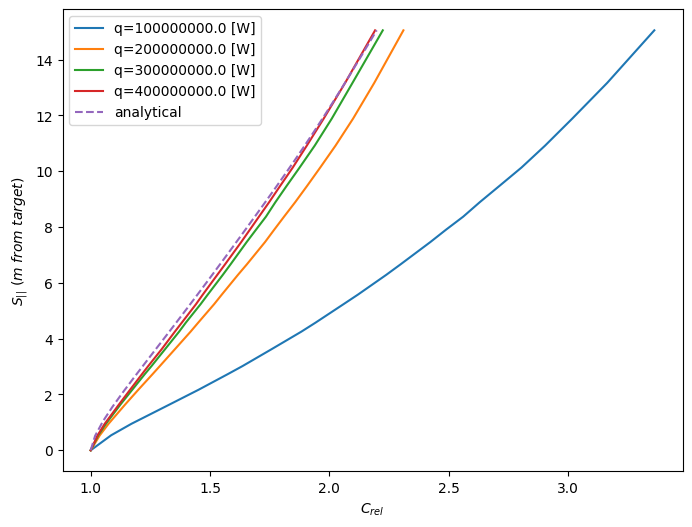

In [4]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
cvar = "density"
design = "V10"
side = "ou"
results_DLS = []
d = eqb[design][side].copy() # Load in single profile into dictionary "d"
constants = constants_default.copy() # Set settings to default
radios = radios_default.copy() # Set settings to default
SparRange = np.linspace(0, d["S"][d["Xpoint"]-1], 30) # Solve at these parallel positions


endresults = []

for heatFlux in np.linspace(1E8,4E8,4):
    constants["qpllu0"] = heatFlux

    results = LRBv21(constants, radios, d, SparRange, verbosity = 0, control_variable = cvar,Ttol=1E-5,Ctol=1E-5)
    ax.plot(results["cvar"]/results["cvar"][0], results["Splot"],label="q="+str(heatFlux)+" [W]")
    endresults.append(results["cvar"][-1]/results["cvar"][0])


resultsAnalytical = []
for s in SparRange:

    resultsAnalytical.append(CfInt(eqb["V10"]["ou"]["S"], eqb["V10"]["ou"]["Btot"],  eqb["V10"]["ou"]["Sx"], np.max(eqb["V10"]["ou"]["S"]),sh = s,kappa1=2500))

ax.plot(resultsAnalytical/resultsAnalytical[0],SparRange,label="analytical",linestyle="--")
ax.set_xlabel("$C_{rel}$")
ax.set_ylabel("$S_{||}\ (m\ from\ target)$")

ax.legend()
plt.show()


# Results

The percentage error for the detachment window (Crel at the end of the scan) for these results should be:

34.60772633  4.85038984  1.15382512 -0.29649834

converging to the result

2.1983038594840334


In [6]:

print("percentage error is",100*(endresults-resultsAnalytical[-1]/resultsAnalytical[0])/endresults)


percentage error is [34.60772633  4.85038984  1.15382512 -0.29649834]
